### Modelos de Segmentación: Seg-Net

**Data**: Imagenes de Fondo de ojo [300] ORIGA.

**Segementación**: Atrofia Peripapilar Alfa y Beta.

**GitHub**: https://github.com/divamgupta/image-segmentation-keras

#### **Cambiar las versiones de librerias instalarlas.**

In [ ]:
!pip install q keras==2.4.3
!pip install tensorflow==2.4.1
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,>=2.8.0rc0, but you have keras 2.4.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 132 kB 64.3 MB/s 
     |████████████████████████████████| 3.8 MB 48.2 MB/s 
     |████████████████████████████████| 2.9 MB 47.7 MB/s 
     |██████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-hdopu1m6
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-hdopu1m6
     |████████████████████████████████| 3.3 MB 13.2 MB/s 
     |████████████████████████████████| 948 kB 49.3 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34557 sha256=2e9585feb357af62c865a9f0de1101e4b12d5e3032e33a02005b49b1410ff755
  Stored in directory: /tmp/pip-ephem-wheel-cache-a_8wc7vp/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    

#### **Preprocesamiento**.

Importar Librerias.

In [ ]:
import numpy as np
import os
import re
import scipy as sp 
import scipy.ndimage as ndimage
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import keras
from keras import optimizers
import tensorflow as tf 
from tensorflow.keras.optimizers import Adagrad
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from numpy import asarray 
from PIL import Image 
from numpy import asarray 

Cargando imagenes de DRIVE a lista.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Resize de la imagenes

*   Crear las carptas donde se guardaran las imagenes.
*   Abrir carpeta de Data Original.
*   Rezsize.
*   Guardar imagenes para nuevo algoritmo en nuevas carpetas. 




In [ ]:
Entrada_1 = '/content/drive/MyDrive/Data/Images_test'
Entrada_2 = '/content/drive/MyDrive/Data/Images_train'
Entrada_3 = '/content/drive/MyDrive/Data/Segmentation_test'
Entrada_4 = '/content/drive/MyDrive/Data/Segmentation_train'
Imagenes = []

#--------------  Images_test  ---------------
Direccion_imagenes = Entrada_1 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/Data/segnet_Img_test/' + filename, img)
          Imagenes.append(img)
          

#--------------  Images_train  ----------------
Direccion_imagenes = Entrada_2 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/Data/segnet_Img_train/' + filename, img)
          Imagenes.append(img)

#------------- Segmentation_test  ---------------
Direccion_imagenes = Entrada_3 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/Data/segnet_Seg_test/' + filename, img)
          Imagenes.append(img)
          

#------------- Segmentation_train  ---------------
Direccion_imagenes = Entrada_4 + os.sep 
cant=0
for root, dirnames, filenames in os.walk(Direccion_imagenes):
    for filename in filenames:
          cant=cant+1
          filepath = os.path.join(root, filename)
          img = cv2.imread(filepath)
          img = cv2.resize(img,(608,416))
          cv2.imwrite('/content/drive/MyDrive/Data/segnet_Seg_train/' + filename, img)
          Imagenes.append(img)


print("Cantidad Imagenes: ",len(Imagenes))

Cantidad Imagenes:  439


#### **Inicializar Modelo Segnet**
Numero de clases igual al valor del pixel mas alto en el componente azul de la imagen.

##### Segnet

In [ ]:
from keras_segmentation.models.segnet import segnet

model_1 = segnet(n_classes=255 ,  input_height=416, input_width=608  )

Entrenamiento de Modelo

In [ ]:
model_1.train(
    train_images =  "/content/drive/MyDrive/Data/segnet_Img_train/",
    train_annotations = "/content/drive/MyDrive/Data/segnet_Seg_train/",
    checkpoints_path = "/tmp/vgg_segnet_1" , epochs=5   
)

Verifying training dataset


100%|██████████| 170/170 [01:20<00:00,  2.12it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 390s 736ms/step - loss: 2.2374 - accuracy: 0.8980

Epoch 00001: saving model to /tmp/vgg_segnet_1.00001
Epoch 2/5
512/512 [==============================] - 353s 690ms/step - loss: 0.0600 - accuracy: 0.9901

Epoch 00002: saving model to /tmp/vgg_segnet_1.00002
Epoch 3/5
512/512 [==============================] - 349s 682ms/step - loss: 0.0503 - accuracy: 0.9904

Epoch 00003: saving model to /tmp/vgg_segnet_1.00003
Epoch 4/5
512/512 [==============================] - 348s 679ms/step - loss: 0.0466 - accuracy: 0.9906

Epoch 00004: saving model to /tmp/vgg_segnet_1.00004
Epoch 5/5
512/512 [==============================] - 347s 679ms/step - loss: 0.0443 - accuracy: 0.9908

Epoch 00005: saving model to /tmp/vgg_segnet_1.00005


Cargar Imagen de Test.

In [ ]:
out_1 = model_1.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0367_ORIGA_jpg.rf.eb64710d45246b6f4b4e925b4e83583b.jpg",
    out_fname="/tmp/out.png"
)

out_2 = model_1.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png"
)
out_3 = model_1.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0389_ORIGA_jpg.rf.f84ba0d087dad45ca3afba17dda0a119.jpg",
    out_fname="/tmp/out.png"
)
out_4 = model_1.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0390_ORIGA_jpg.rf.b4ee969ab9ac8b014cd17803b25c684e.jpg",
    out_fname="/tmp/out.png"
)


Visualizar Imagen Segmentada.

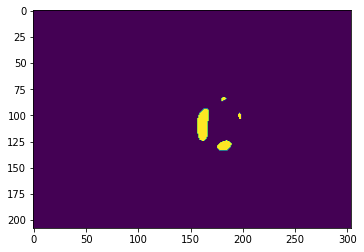

In [ ]:
plt.imshow(out_1)

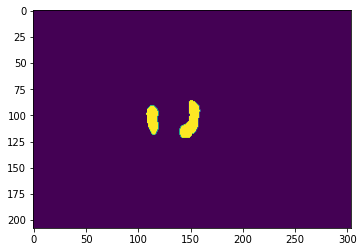

In [ ]:
plt.imshow(out_2)


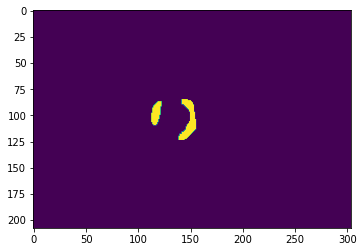

In [ ]:
plt.imshow(out_3)


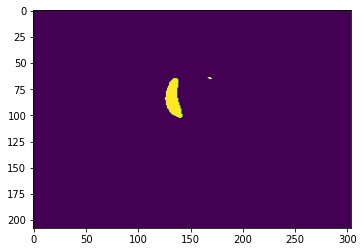

In [ ]:
plt.imshow(out_4)

In [ ]:
Clases =[]
for i in range(255):
    clase = str(i)
    Clases.append(clase)
o = model_1.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png" , overlay_img=True

)

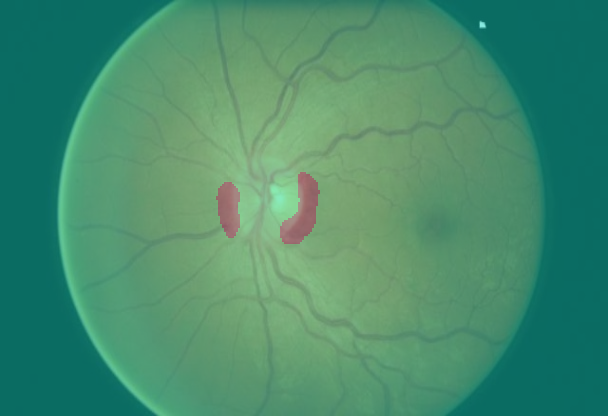

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

#### **Inicializar Modelo vgg_segnet.**
Numero de clases igual al valor del pixel mas alto en el componente azul de la imagen.

In [ ]:
from keras_segmentation.models.segnet import vgg_segnet

model_2 = vgg_segnet(n_classes=255 ,  input_height=416, input_width=608  )

58892288/58889256 [==============================] - 2s 0us/step


Entrenamiento de Modelo

In [ ]:
model_2.train(
    train_images =  "/content/drive/MyDrive/Data/segnet_Img_train/",
    train_annotations = "/content/drive/MyDrive/Data/segnet_Seg_train/",
    checkpoints_path = "/tmp/vgg_segnet_1" , epochs=5   
)

Verifying training dataset


100%|██████████| 170/170 [01:17<00:00,  2.18it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 343s 644ms/step - loss: 1.8878 - accuracy: 0.8661

Epoch 00001: saving model to /tmp/vgg_segnet_1.00001
Epoch 2/5
512/512 [==============================] - 336s 656ms/step - loss: 0.0523 - accuracy: 0.9903

Epoch 00002: saving model to /tmp/vgg_segnet_1.00002
Epoch 3/5
512/512 [==============================] - 321s 627ms/step - loss: 0.0477 - accuracy: 0.9906

Epoch 00003: saving model to /tmp/vgg_segnet_1.00003
Epoch 4/5
512/512 [==============================] - 335s 655ms/step - loss: 0.0436 - accuracy: 0.9911

Epoch 00004: saving model to /tmp/vgg_segnet_1.00004
Epoch 5/5
512/512 [==============================] - 328s 641ms/step - loss: 0.0423 - accuracy: 0.9913

Epoch 00005: saving model to /tmp/vgg_segnet_1.00005


Cargar Imagen de Test.

In [ ]:
out_1 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0367_ORIGA_jpg.rf.eb64710d45246b6f4b4e925b4e83583b.jpg",
    out_fname="/tmp/out.png"
)

out_2 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png"
)
out_3 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0389_ORIGA_jpg.rf.f84ba0d087dad45ca3afba17dda0a119.jpg",
    out_fname="/tmp/out.png"
)
out_4 = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0390_ORIGA_jpg.rf.b4ee969ab9ac8b014cd17803b25c684e.jpg",
    out_fname="/tmp/out.png"
)


Visualizar Imagen Segmentada.

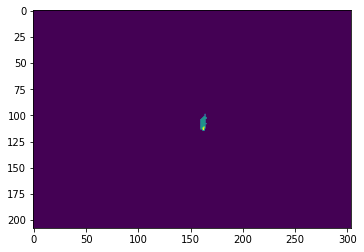

In [ ]:
plt.imshow(out_1)

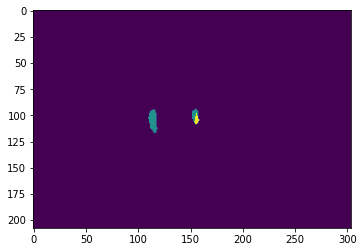

In [ ]:
plt.imshow(out_2)

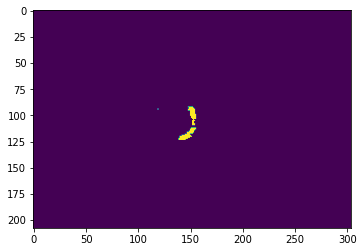

In [ ]:
plt.imshow(out_3)

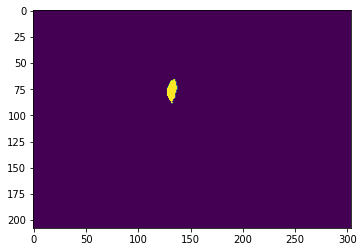

In [ ]:
plt.imshow(out_4)

In [ ]:
Clases =[]
for i in range(255):
    clase = str(i)
    Clases.append(clase)
o = model_2.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = Clases

)

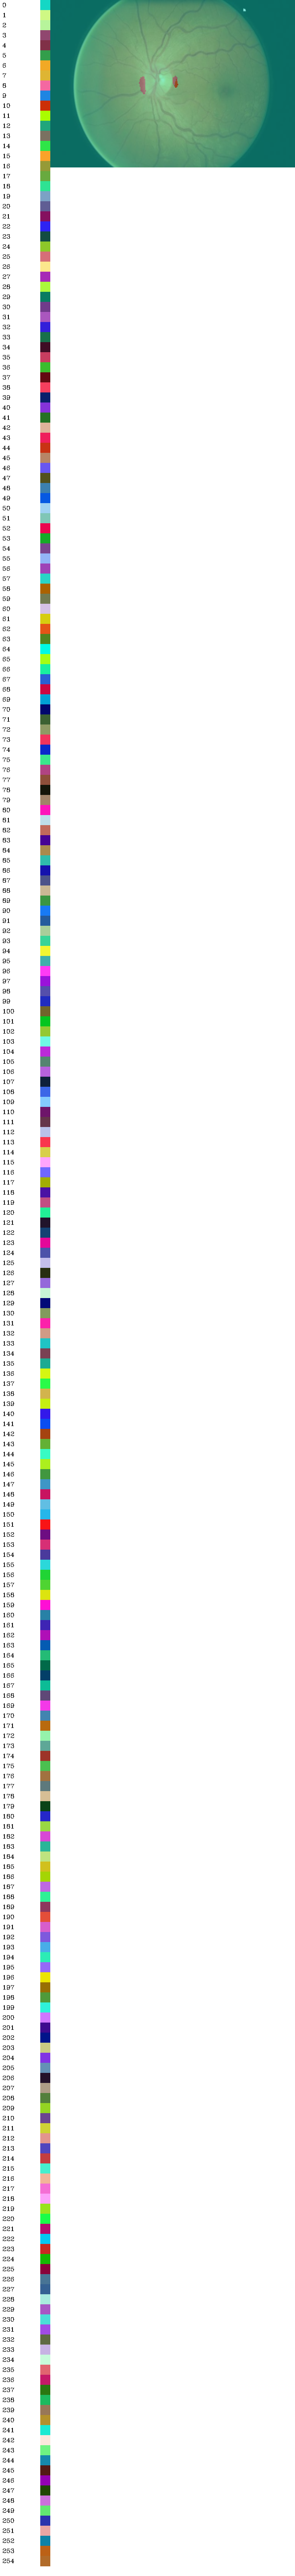

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

#### **Inicializar Modelo Resnet50_segnet.**
Numero de clases igual al valor del pixel mas alto en el componente azul de la imagen.

In [ ]:
from keras_segmentation.models.segnet import resnet50_segnet

model_3 = resnet50_segnet(n_classes=255 ,  input_height=416, input_width=608  )

94658560/94653016 [==============================] - 4s 0us/step


Entrenamiento de Modelo

In [ ]:
model_3.train(
    train_images =  "/content/drive/MyDrive/Data/segnet_Img_train/",
    train_annotations = "/content/drive/MyDrive/Data/segnet_Seg_train/",
    checkpoints_path = "/tmp/vgg_segnet_1" , epochs=5   
)

Verifying training dataset


100%|██████████| 170/170 [00:02<00:00, 73.39it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 333s 637ms/step - loss: 1.7630 - accuracy: 0.9092

Epoch 00001: saving model to /tmp/vgg_segnet_1.00001
Epoch 2/5
512/512 [==============================] - 326s 638ms/step - loss: 0.0377 - accuracy: 0.9925

Epoch 00002: saving model to /tmp/vgg_segnet_1.00002
Epoch 3/5
512/512 [==============================] - 308s 602ms/step - loss: 0.0295 - accuracy: 0.9940

Epoch 00003: saving model to /tmp/vgg_segnet_1.00003
Epoch 4/5
512/512 [==============================] - 333s 651ms/step - loss: 0.0251 - accuracy: 0.9952

Epoch 00004: saving model to /tmp/vgg_segnet_1.00004
Epoch 5/5
512/512 [==============================] - 340s 664ms/step - loss: 0.0241 - accuracy: 0.9955

Epoch 00005: saving model to /tmp/vgg_segnet_1.00005


Cargar Imagen de Test.

In [ ]:
out_1 = model_3.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0367_ORIGA_jpg.rf.eb64710d45246b6f4b4e925b4e83583b.jpg",
    out_fname="/tmp/out.png"
)

out_2 = model_3.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0376_ORIGA_jpg.rf.0cde0709616d5ff3cc6d9634da57744f.jpg",
    out_fname="/tmp/out.png"
)
out_3 = model_3.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0389_ORIGA_jpg.rf.f84ba0d087dad45ca3afba17dda0a119.jpg",
    out_fname="/tmp/out.png"
)
out_4 = model_3.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0390_ORIGA_jpg.rf.b4ee969ab9ac8b014cd17803b25c684e.jpg",
    out_fname="/tmp/out.png"
)

Visualizar Imagen Segmentada.

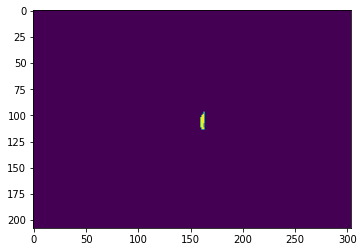

In [ ]:
plt.imshow(out_1)

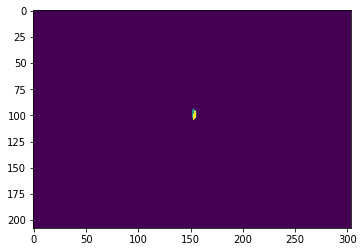

In [ ]:
plt.imshow(out_2)

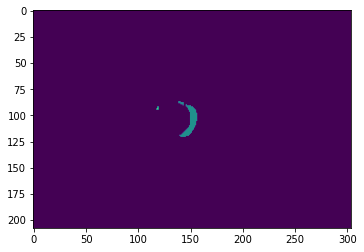

In [ ]:
plt.imshow(out_3)

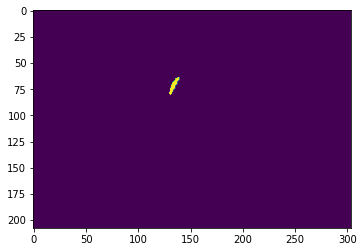

In [ ]:
plt.imshow(out_4)

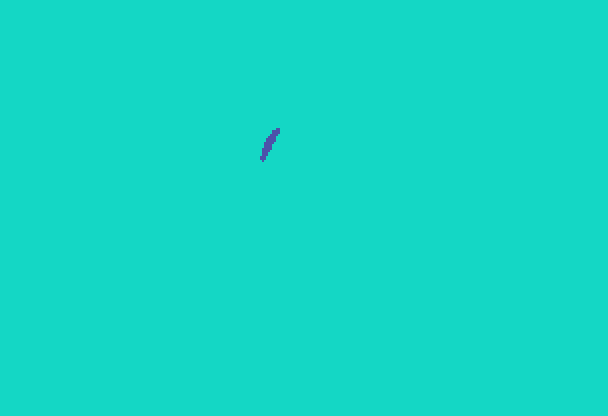

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
Clases =[]
for i in range(2):
    clase = 'Alfa'+ str(i)
    Clases.append(clase)
o = model_3.predict_segmentation(
    inp="/content/drive/MyDrive/Data/segnet_Img_test/Im0389_ORIGA_jpg.rf.f84ba0d087dad45ca3afba17dda0a119.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = Clases

)

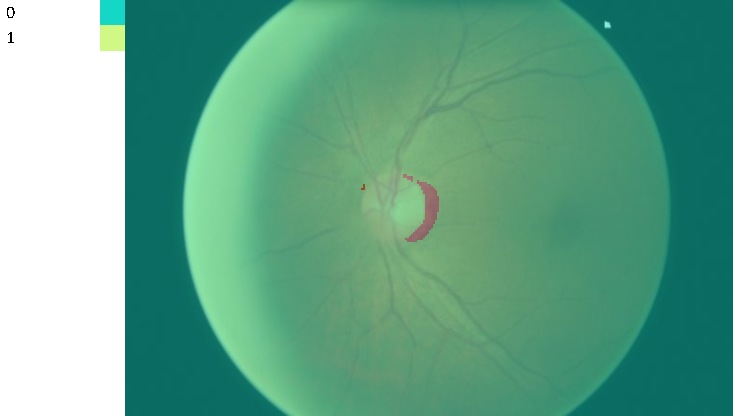

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

#### **Codigo Prueba**

In [ ]:
image_files = []
masks_path = "/content/drive/MyDrive/Data/Segmentation_test"
for dir_entry in os.listdir(masks_path):
  file_name, file_extension = os.path.splitext(dir_entry)
  image_files.append((os.path.join(masks_path,dir_entry)))
print(image_files)

['/content/drive/MyDrive/Data/Segmentation_test/Im0579_g_ORIGA_jpg.rf.3fee447e43639ca6aae1db5195b3c7e4.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0453_ORIGA_jpg.rf.f435de0862ce8c405c5609ec0d3d7015.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0575_g_ORIGA_jpg.rf.ac34183b89788d2a2b8683e345105953.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0411_ORIGA_jpg.rf.63ee558cb3c1ba44df030a91555f5252.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0631_g_ORIGA_jpg.rf.676f3c579e37ea584c32eb096b667fb9.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0516_g_ORIGA_jpg.rf.734be0154faf4dc21244b30489ef775f.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0427_ORIGA_jpg.rf.9db57a0d3e37f5b597ed377b21507277.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0571_g_ORIGA_jpg.rf.2e28a84c597966e672bddb4b49c6b12b.png', '/content/drive/MyDrive/Data/Segmentation_test/Im0398_ORIGA_jpg.rf.708621c5ab46bad6f20ec2f21b37bbf2.png', '/content/drive/MyDrive/Data/Segmen

In [ ]:
for img in (image_files):
  imgt = cv2.imread(img)
  for i in range(imgt.shape[0]):
    for j in range(imgt.shape[1]):
      if imgt[:,:,2][i][j]==124:
        imgt[:,:,0][i][j]==1
        imgt[:,:,0][i][j]==1
        imgt[:,:,0][i][j]==1
      elif imgt[:,:,2][i][j]==245:
        imgt[:,:,0][i][j]=2
        imgt[:,:,1][i][j]=2
        imgt[:,:,2][i][j]=2
  cv2.imwrite(img,imgt)


1 Imagen
Max R: 245.0
Max G: 61.0
Max B: 255.0
2 Imagen
Min R: 245.0
Min G: 61.0
Min B: 255.0


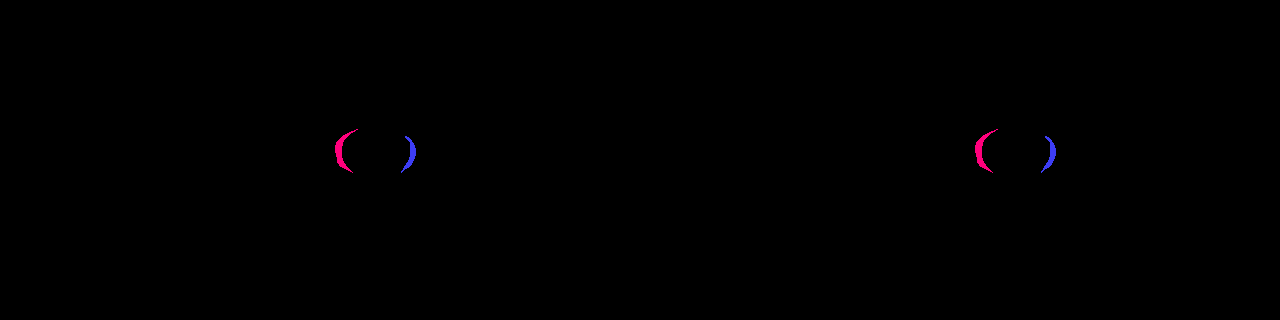

In [ ]:
from numpy import asarray 
from PIL import Image 
from numpy import asarray 
#

#img=Imagenes[3]
#A = img.astype(np.float32)/255

A = imgt
B = imgt
#Analiza Pixeles
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(A[:,:,0])
(minVal_1, maxVal_1, minLoc, maxLoc) = cv2.minMaxLoc(A[:,:,1])
(minVal_2, maxVal_2, minLoc, maxLoc) = cv2.minMaxLoc(A[:,:,2])

(minVal, maxVal_3, minLoc, maxLoc) = cv2.minMaxLoc(B[:,:,0])
(minVal_1, maxVal_4, minLoc, maxLoc) = cv2.minMaxLoc(B[:,:,1])
(minVal_2, maxVal_5, minLoc, maxLoc) = cv2.minMaxLoc(B[:,:,2])

print('1 Imagen')
print('Max R:',maxVal)
print('Max G:',maxVal_1)
print('Max B:',maxVal_2)
print('2 Imagen')
print('Min R:',maxVal_3)
print('Min G:',maxVal_4)
print('Min B:',maxVal_5)
concat_horizontal = cv2.hconcat([A, B])
cv2_imshow(concat_horizontal) 

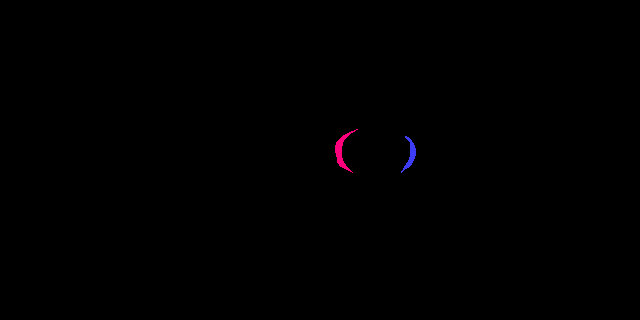

In [ ]:
cv2_imshow(imgt)